<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r11_i1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-15-m-1-r11.csv?token=AKVFSOH4TC4IY3N4CSRVFYK63JDDO')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-normal-n-0-15-r11.csv?token=AKVFSOCYILXP5XA4GGQEKYC63JDES')


In [0]:
df = df1.append(df9, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,11,3,1,1,1,4,3,9,15,15,23,7,3,2,1,0.5,8,76,1,76,76,3,12,3,27,0
1,11,3,1,1,1,4,3,9,15,15,23,7,2,2,1,0.5,8,67,1,67,67,3,8,3,27,1
2,58,1,3,4,1,1,5,17,23,7,15,15,2,2,1,0.5,8,66,2,67,132,3,8,20,340,1
3,58,1,3,4,1,1,5,17,23,7,15,15,3,2,1,0.5,8,75,2,76,150,3,12,20,340,0
4,59,1,3,4,2,2,5,17,23,7,15,15,2,2,1,0.5,9,65,3,67,195,3,32,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156295,3276921,4,0,6,3,2,3,11,27,11,24,8,30095,3,0,0.0,18,5,45,49,225,0,1083420,18,198,0
156296,3276928,4,0,6,4,2,3,11,27,11,24,8,30095,3,0,0.0,25,4,46,49,184,0,1444560,18,198,0
156297,3276935,4,0,6,5,3,3,11,27,11,24,8,30095,3,0,0.0,32,3,47,49,141,0,2708550,18,198,0
156298,3276936,4,0,2,1,4,3,12,27,11,24,8,30096,3,0,0.0,32,2,48,49,96,0,240768,6,72,0


In [6]:
df.shape

(156300, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-15-m-11-r11.csv?token=AKVFSOBY5KWVYP7MVPVLSKS63JDDQ')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-15-m-12-r11.csv?token=AKVFSODFX632MJC3CW5FU7S63JEEK')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r11/2-fft-malicious-n-0-15-m-7-r11.csv?token=AKVFSOGYGNPHWB42VH7Q2GK63JEEQ')


In [8]:
print(df13.shape)
print(df14.shape)
print(df15.shape)

(140275, 26)
(91737, 26)
(96751, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.472616,-0.145706,-0.010784,0.016773,0.180405,0.278574,0.004473,0.249348,-0.600390,-0.825969,-0.448731,-0.023078,0.064080,0.032167,0.033354,-0.095798,-0.042059,0.030214,0.210709,-0.038403
inport,-0.472616,1.000000,-0.033655,0.004494,-0.006990,0.205678,0.073185,-0.051731,0.362208,0.708715,0.575229,0.250403,-0.028265,-0.092578,-0.094802,-0.087553,0.804732,-0.054997,0.152255,0.119998,0.058285
cache_coherence_type,-0.145706,-0.033655,1.000000,0.161606,-0.251347,-0.365321,-0.402295,0.040235,-0.062045,0.077001,0.193794,-0.014120,0.036905,-0.040085,-0.002495,0.000480,-0.076466,0.284422,0.565769,-0.067308,-0.005336
flit_id,-0.010784,0.004494,0.161606,1.000000,0.041298,0.221395,0.192714,-0.000964,0.028660,0.011282,0.004549,0.291604,-0.036148,0.031106,-0.003956,-0.004543,0.032044,0.627150,0.339836,0.282816,0.002771
flit_type,0.016773,-0.006990,-0.251347,0.041298,1.000000,-0.344337,-0.299729,0.001499,-0.044575,-0.017547,-0.007075,0.314579,-0.024086,0.033550,0.007425,0.007799,-0.049838,0.179813,-0.528549,-0.439865,-0.004310
vnet,0.180405,0.205678,-0.365321,0.221395,-0.344337,1.000000,0.975238,-0.070018,0.203013,-0.120233,-0.351684,-0.470581,-0.094053,0.010048,-0.065902,-0.066036,0.339635,-0.092629,0.560884,0.943201,0.042758
vc,0.278574,0.073185,-0.402295,0.192714,-0.299729,0.975238,1.000000,-0.058249,0.175495,-0.227644,-0.468453,-0.511500,-0.087514,0.029703,-0.045354,-0.046818,0.228874,-0.100739,0.506066,0.936085,0.031182
traversal_id,0.004473,-0.051731,0.040235,-0.000964,0.001499,-0.070018,-0.058249,1.000000,-0.015023,-0.015828,0.000845,0.036644,0.168217,0.169219,0.264720,0.207382,-0.092255,0.556725,-0.026238,-0.054081,-0.321975
hop_count,0.249348,0.362208,-0.062045,0.028660,-0.044575,0.203013,0.175495,-0.015023,1.000000,0.565799,0.083464,0.203766,-0.028038,-0.031369,-0.046605,-0.030961,0.324109,-0.027440,0.124646,0.180588,-0.011379
current_hop,-0.600390,0.708715,0.077001,0.011282,-0.017547,-0.120233,-0.227644,-0.015828,0.565799,1.000000,0.780054,0.624578,-0.000073,-0.096128,-0.075471,-0.061164,0.417522,0.015366,-0.038019,-0.176662,0.020476


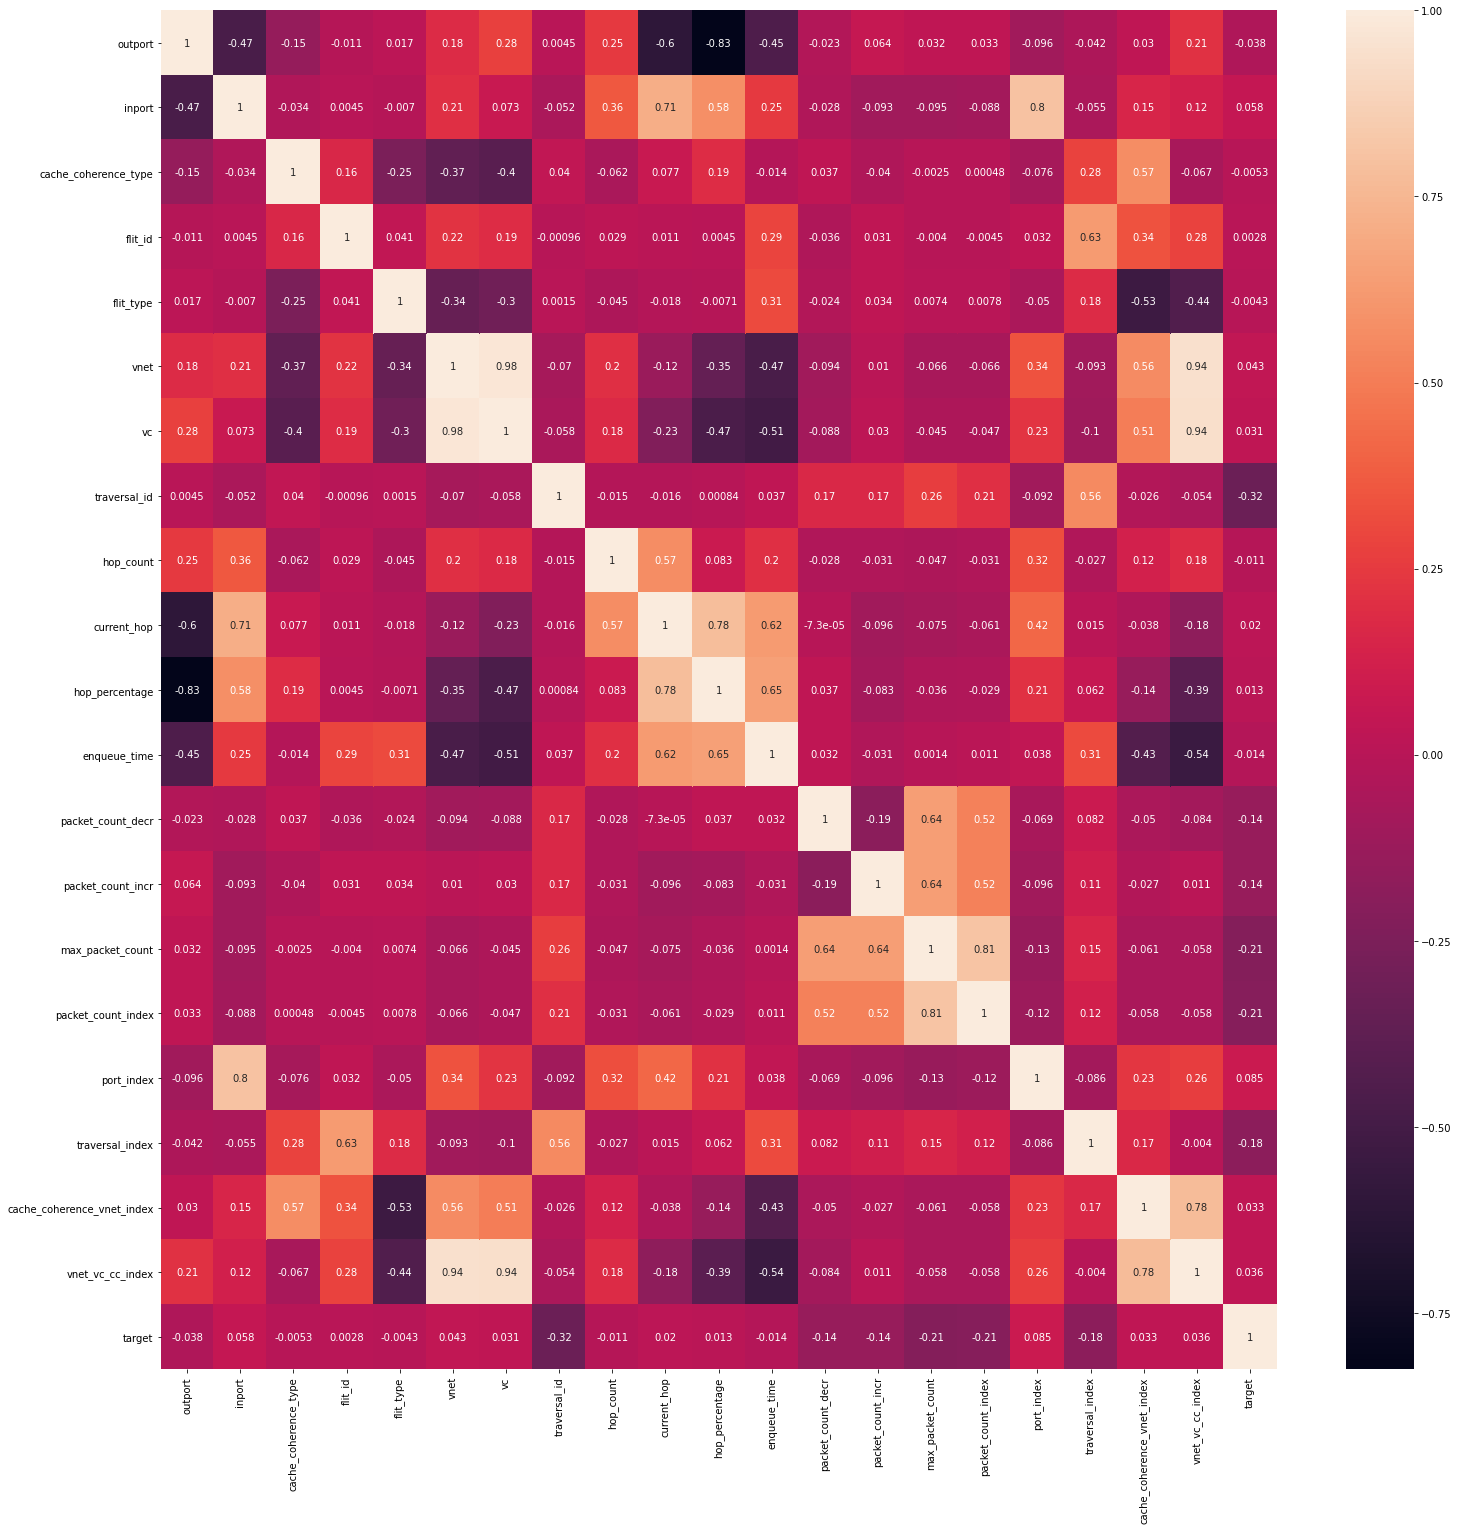

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

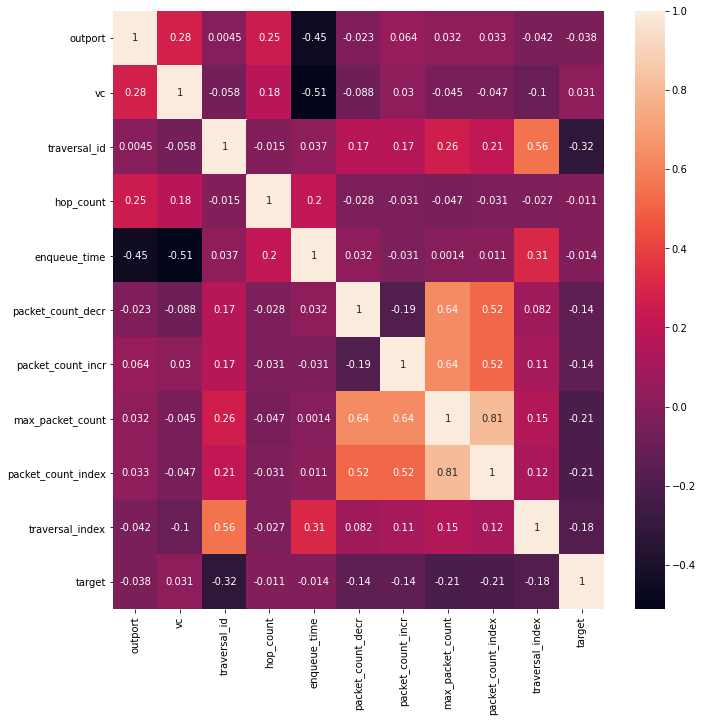

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

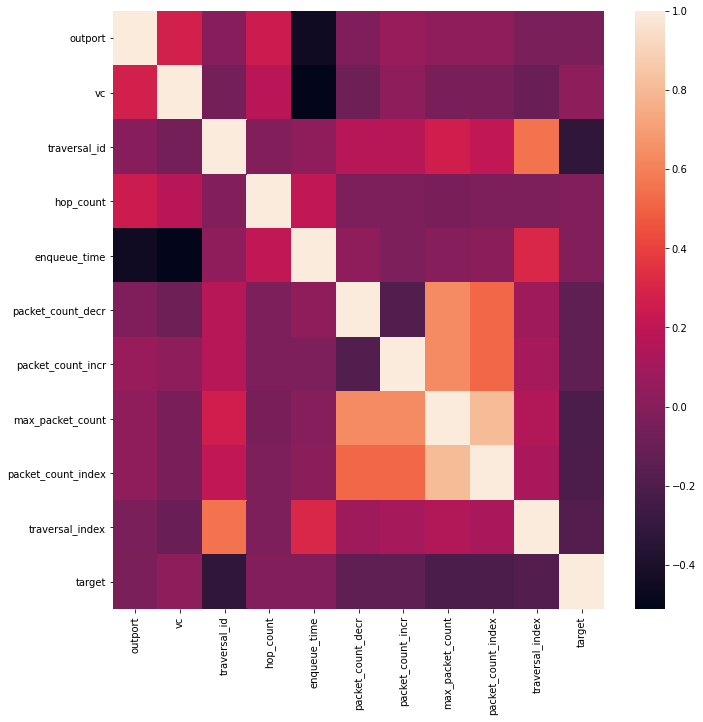

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.75,0.000000,0.000033,0.2,0.058824,0.428571,0.000000,0.428571,0.009577,0.000001
1,0.75,0.000000,0.000000,0.2,0.058824,0.377143,0.000000,0.377143,0.008428,0.000000
2,0.25,0.727273,0.000000,0.2,0.058824,0.371429,0.005714,0.377143,0.016728,0.000000
3,0.25,0.727273,0.000033,0.2,0.058824,0.422857,0.005714,0.428571,0.019027,0.000001
4,0.25,0.727273,0.000000,0.2,0.073529,0.365714,0.011429,0.377143,0.024773,0.000009
...,...,...,...,...,...,...,...,...,...,...
156295,1.00,0.181818,0.999967,0.4,0.205882,0.022857,0.251429,0.274286,0.028604,0.399998
156296,1.00,0.181818,0.999967,0.4,0.308824,0.017143,0.257143,0.274286,0.023369,0.533332
156297,1.00,0.181818,0.999967,0.4,0.411765,0.011429,0.262857,0.274286,0.017878,1.000000
156298,1.00,0.272727,1.000000,0.4,0.411765,0.005714,0.268571,0.274286,0.012131,0.088889


In [20]:
train_X[train_X.duplicated()].shape

(23, 10)

In [21]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.75,0.000000,0.000000,0.166667,0.000000,0.622010,0.000000,0.622010,0.011681,0.000000
1,0.75,0.000000,0.000033,0.333333,0.055556,0.617225,0.004785,0.622010,0.023273,0.000001
2,0.00,0.727273,0.000000,0.166667,0.055556,0.612440,0.009569,0.622010,0.034684,0.000000
3,0.00,0.727273,0.000000,0.166667,0.069444,0.607656,0.014354,0.622010,0.045916,0.000009
4,0.00,0.727273,0.000000,0.166667,0.083333,0.602871,0.019139,0.622010,0.056968,0.000015
...,...,...,...,...,...,...,...,...,...,...
140270,0.00,0.000000,0.999967,0.166667,0.444444,0.019139,0.076555,0.095694,0.007548,0.833610
140271,0.00,0.090909,1.000000,0.166667,0.444444,0.014354,0.081340,0.095694,0.006380,0.044458
140272,1.00,0.181818,0.999967,0.500000,0.000000,0.009569,0.086124,0.095694,0.005032,0.066686
140273,1.00,0.181818,0.999967,0.500000,0.097222,0.004785,0.090909,0.095694,0.003504,0.266753


In [22]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [25]:
train_Y = df['target']
train_Y.value_counts()

0    88528
1    67772
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  1772.839523
9     traversal_index   601.649689
8  packet_count_index   572.572557
7    max_packet_count   495.907417
5   packet_count_decr   255.720351
6   packet_count_incr   240.307618
0             outport    59.730954
1                  vc    35.003101
3           hop_count     4.732065
4        enqueue_time     2.939372


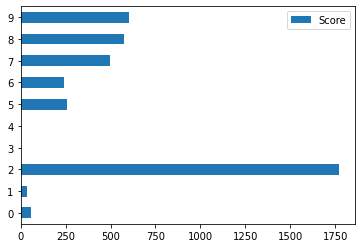

In [28]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [33]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 98.31361427029918
Test Prediction Score 97.7219411000601


In [34]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 82.7802530743183
Test Prediction Score 79.74426894273849
Test Prediction Score 82.3092267780178


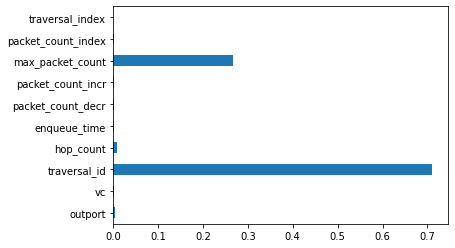

In [35]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

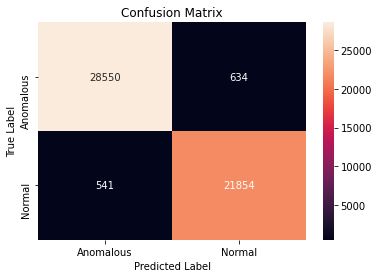

In [36]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [37]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     29184
           1       0.97      0.98      0.97     22395

    accuracy                           0.98     51579
   macro avg       0.98      0.98      0.98     51579
weighted avg       0.98      0.98      0.98     51579



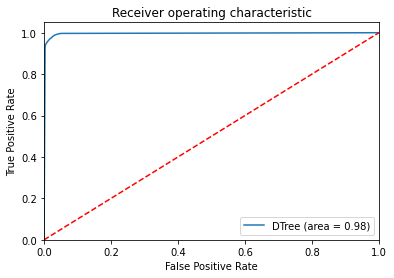

In [38]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [40]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r11l-i1.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [43]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.99045081693261
Test Prediction Score 99.72081661141162


In [44]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 83.8381750133666
Test Prediction Score 80.18574838941758
Test Prediction Score 82.5572862295997


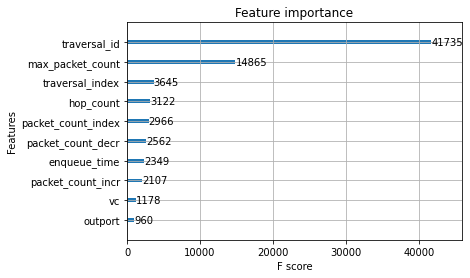

In [45]:
plot_importance(xgbc)
plt.show()

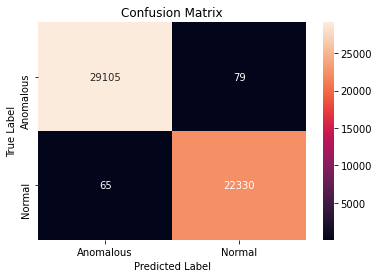

In [46]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [47]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29184
           1       1.00      1.00      1.00     22395

    accuracy                           1.00     51579
   macro avg       1.00      1.00      1.00     51579
weighted avg       1.00      1.00      1.00     51579



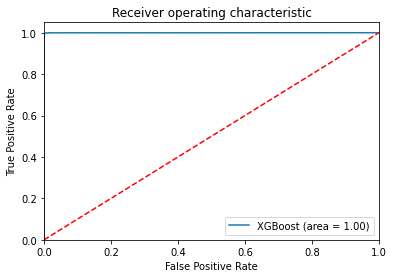

In [48]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()